# Quantum Fourier Transform Benchmark

In [1]:
low = 1
high = 27
samples = 10

In [2]:
import time
import random
import math

## PyQrack

In [3]:
%env QRACK_QUNITMULTI_DEVICES 1
from pyqrack import QrackSimulator, Pauli

def reverse_qrack(sim):
    start = 0
    end = sim.num_qubits() - 1
    while (start < end):
        sim.swap(start, end)
        start += 1
        end -= 1

env: QRACK_QUNITMULTI_DEVICES=1


### |0> initialization

In [4]:
def bench_qrack_0(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    # Permutation basis eigenstate initialization before QFT is "trivial" for Qrack.
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    sim.qft(qubits)
    reverse_qrack(sim)
    sim.m_all()

    return time.perf_counter() - start

qrack_0_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack_0(n))

    qrack_0_results[n] = sum(width_results) / samples

print(qrack_0_results)

Device #0, Loaded binary from: /home/iamu/.qrack/qrack_ocl_dev_Intel(R)_UHD_Graphics_[0x9bc4].ir
Device #1, Loaded binary from: /home/iamu/.qrack/qrack_ocl_dev_NVIDIA_GeForce_RTX_3080_Laptop_GPU.ir
{1: 1.1074500071117654e-05, 2: 1.105130031646695e-05, 3: 1.1764199734898284e-05, 4: 1.4221099991118536e-05, 5: 1.6164500084414613e-05, 6: 1.8400200133328326e-05, 7: 2.0168500486761332e-05, 8: 2.2718900072504767e-05, 9: 2.5311699755548033e-05, 10: 2.8591800037247596e-05, 11: 3.0611399961344435e-05, 12: 3.3859100403788035e-05, 13: 3.6104299761063884e-05, 14: 4.0348699621972627e-05, 15: 4.227669996907935e-05, 16: 4.5758399755868596e-05, 17: 4.9083000340033324e-05, 18: 5.2794700059166645e-05, 19: 5.602689961961005e-05, 20: 6.023910027579405e-05, 21: 6.34797002931009e-05, 22: 6.764359986846102e-05, 23: 7.244660046126227e-05, 24: 7.557530007034075e-05, 25: 7.962130002852064e-05, 26: 8.45360997118405e-05, 27: 8.826410012261477e-05}


### Random 1-qubit unitary initialization

In [5]:
def bench_qrack(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    # Permutation basis eigenstate initialization before QFT is "trivial" for Qrack,
    # so we give it a realistic case instead.
    for i in range(n):
        # Initialize with uniformly random single qubit gates, across full width.
        sim.u(i, random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi))
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    sim.qft(qubits)
    reverse_qrack(sim)
    sim.m_all()

    return time.perf_counter() - start

qrack_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack(n))

    qrack_results[n] = sum(width_results) / samples

print(qrack_results)

{1: 4.700030003732536e-05, 2: 6.31987999440753e-05, 3: 0.00018588630027807084, 4: 0.00020677920001617168, 5: 0.0001985863998925197, 6: 0.00029015390027780085, 7: 0.00041059259965550157, 8: 0.0004745733998788637, 9: 0.0006229585998880794, 10: 0.0008372903999770642, 11: 0.0016144468998390948, 12: 0.005148069999995642, 13: 0.0024713662000067417, 14: 0.002927732700118213, 15: 0.003402038700187404, 16: 0.003830354599995189, 17: 0.004030123399752483, 18: 0.004484991699791862, 19: 0.005564613300703058, 20: 0.007891703599852917, 21: 0.010456214000259933, 22: 0.017100728200239244, 23: 0.028661035100230946, 24: 0.05044752659941878, 25: 0.0953378371998042, 26: 0.18614661090014123, 27: 0.3548351679999541}


### GHZ state initialization

In [6]:
def bench_qrack(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    sim.h(0)
    for i in range(n - 1):
        sim.mcx([i], i + 1)
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    sim.qft(qubits)
    reverse_qrack(sim)
    sim.m_all()

    return time.perf_counter() - start

qrack_k_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack(n))

    qrack_k_results[n] = sum(width_results) / samples

print(qrack_k_results)

{1: 2.6357199931226206e-05, 2: 3.017230028490303e-05, 3: 0.00012956190021213844, 4: 0.00017196369972225512, 5: 0.00014597500012314413, 6: 0.00014637489985034336, 7: 0.00020184549975965638, 8: 0.00019998200004920364, 9: 0.00035567190006986494, 10: 0.0005284225002469611, 11: 0.001607508100096311, 12: 0.0018600269004309666, 13: 0.002148006199786323, 14: 0.002513666699996975, 15: 0.0026653443004761358, 16: 0.002774707800199394, 17: 0.003194232900204952, 18: 0.0034305238998058483, 19: 0.004464874100085581, 20: 0.008846356899812235, 21: 0.015931890099818703, 22: 0.028465692500321892, 23: 0.05372357639989787, 24: 0.10606798570024693, 25: 0.21654737000026217, 26: 0.4548611419999361, 27: 0.9261649988004137}


## FFTW ("Classical" DFT)

In [7]:
import pyfftw
import numpy as np

# See https://blog.hpc.qmul.ac.uk/pyfftw.html
pyfftw.interfaces.cache.enable()
pyfftw.interfaces.cache.set_keepalive_time(60)
total_time = 0

### |0> initialization

In [8]:
fftw_0_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.zeros_aligned(2**n, dtype=np.complex64)
        io_array[0] = 1.
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.ifft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_0_results[n] = sum(width_results) / samples

print(fftw_0_results)

{1: 6.619589930778602e-05, 2: 4.9448300160293e-05, 3: 3.989019969594665e-05, 4: 6.78426999002113e-05, 5: 6.496000041806837e-05, 6: 5.9077100195281675e-05, 7: 0.00013388779989327305, 8: 4.2356100129836706e-05, 9: 4.3192099838051945e-05, 10: 4.5434699859470126e-05, 11: 5.489060004038038e-05, 12: 7.958330006658798e-05, 13: 0.0001283333000174025, 14: 0.00022669180034426973, 15: 0.0004270899999028188, 16: 0.000871080200158758, 17: 0.0014951133000067785, 18: 0.0022847932999866317, 19: 0.008229995699912252, 20: 0.016546361599830563, 21: 0.015228153099815244, 22: 0.0488994476996595, 23: 0.10734333140007948, 24: 0.21014349849974678, 25: 0.4075038357999802, 26: 0.92284033119995, 27: 1.8296034293998673}


### Random 1-qubit unitary initialization

In [9]:
fftw_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.empty_aligned(2**n, dtype=np.complex64)
        
        # Use Qrack to initialize the test case!
        sim = QrackSimulator(n)
        for i in range(n):
            # Initialize with uniformly random single qubit gates, across full width.
            sim.u(i, random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi))
        ket = sim.out_ket()
        del sim
        for i in range(2**n):
            io_array[i] = ket[i]
        del ket
        
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.ifft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_results[n] = sum(width_results) / samples

print(fftw_results)

{1: 3.121169993391959e-05, 2: 2.8327400104899426e-05, 3: 2.8493300123955124e-05, 4: 3.2029900103225374e-05, 5: 3.2232100420515056e-05, 6: 3.375120013515698e-05, 7: 3.650220005511073e-05, 8: 3.7581500328087715e-05, 9: 3.8693399983458224e-05, 10: 4.076910045114346e-05, 11: 4.72703995910706e-05, 12: 6.2376600180869e-05, 13: 9.050670014403295e-05, 14: 0.0001412096000422025, 15: 0.0002402197000265005, 16: 0.0004962402999808546, 17: 0.0010262649000651435, 18: 0.0024026484999922102, 19: 0.008677855700261717, 20: 0.015901437400134454, 21: 0.01191378090006765, 22: 0.04720618289993581, 23: 0.09904788559997542, 24: 0.19578616589988088, 25: 0.37514290500021163, 26: 0.87201001359972, 27: 2.022888144600438}


### GHZ initialization

In [10]:
fftw_k_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.zeros_aligned(2**n, dtype=np.complex64)
        io_array[0] = 1 / math.sqrt(2)
        io_array[2**n - 1] = 1 / math.sqrt(2)
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.ifft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_k_results[n] = sum(width_results) / samples

print(fftw_k_results)

{1: 0.0002592610000647255, 2: 4.627090002031764e-05, 3: 3.852600002574036e-05, 4: 4.6684200060553846e-05, 5: 2.0210900038364345e-05, 6: 0.00010439759953442262, 7: 3.88502001442248e-05, 8: 2.006049999181414e-05, 9: 2.1400600053311793e-05, 10: 2.3322099877987057e-05, 11: 0.00010410580034658778, 12: 7.682339983148268e-05, 13: 9.762869995029177e-05, 14: 9.33540995902149e-05, 15: 0.00018879900017054752, 16: 0.0003927718002159963, 17: 0.0008209840998461004, 18: 0.0020669059000283595, 19: 0.007615516099940578, 20: 0.015842811400034407, 21: 0.01844735589966149, 22: 0.05509846209988609, 23: 0.10808066530062206, 24: 0.19285312789979797, 25: 0.377880900999844, 26: 0.8960739954003657, 27: 1.8301832670003932}


## Qiskit Aer

In [11]:
from qiskit import QuantumCircuit
from qiskit import execute, Aer
from qiskit.providers.aer import QasmSimulator

def reverse_aer(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        circ.swap(start, end)
        start += 1
        end -= 1

# Implementation of the Quantum Fourier Transform
def aer_qft(num_qubits, circ):
    # Quantum Fourier Transform
    for j in range(num_qubits):
        for k in range(j):
            circ.cp(math.pi/float(2**(j-k)), j, k)
        circ.h(j)
    reverse_aer(num_qubits, circ)
    for j in range(num_qubits):
        circ.measure(j, j)

    return circ

sim_backend = QasmSimulator(shots=1, method='statevector_gpu')

def bench_aer(num_qubits):
    circ = QuantumCircuit(num_qubits, num_qubits)
    aer_qft(num_qubits, circ)
    start = time.perf_counter()
    job = execute([circ], sim_backend, timeout=600)
    result = job.result()
    return time.perf_counter() - start

aer_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_aer(n))

    aer_results[n] = sum(width_results) / samples

print(aer_results)

{1: 0.03168567249995249, 2: 0.004726702599327837, 3: 0.004905351599882124, 4: 0.00711298140049621, 5: 0.006282341700170946, 6: 0.0076522752997334464, 7: 0.007274919100018451, 8: 0.008135039700209745, 9: 0.008915546300522692, 10: 0.011451662199760904, 11: 0.010985581699787871, 12: 0.011945513099999517, 13: 0.012973006000174791, 14: 0.013639754999894648, 15: 0.016211112099699675, 16: 0.016890159100148593, 17: 0.02082181580026372, 18: 0.02047699389986519, 19: 0.023821651000071144, 20: 0.029212916699543713, 21: 0.042105588700178484, 22: 0.06210963430003176, 23: 0.10355548469979112, 24: 0.19541433889990004, 25: 0.3848050932998376, 26: 0.824856195799839, 27: 1.6789881988999695}


## Qulacs

In [12]:
import qulacs

def reverse_qulacs(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        circ.add_gate(qulacs.gate.SWAP(start, end))
        start += 1
        end -= 1

def get_rotz(exponent: float) -> np.ndarray:
    return np.diag([1., np.exp(1.j * np.pi * exponent)])

def bench_qulacs(n):
    sim = qulacs.QuantumStateGpu(n)
    circ = qulacs.QuantumCircuit(n)
    start = time.perf_counter()

    for j in range(n):
        for k in range(j):
            mat = get_rotz(math.pi/float(2**(j-k)))
            gate = qulacs.gate.DenseMatrix(k, mat)
            gate.add_control_qubit(j, 1)
            circ.add_gate(gate)
        circ.add_gate(qulacs.gate.H(j))
    reverse_qulacs(n, circ)
    for index in range(n):
        circ.add_gate(qulacs.gate.Measurement(index, index))

    circ.update_quantum_state(sim)

    return time.perf_counter() - start

qulacs_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qulacs(n))

    qulacs_results[n] = sum(width_results) / samples

print(qulacs_results)

{1: 0.00016525169976375765, 2: 0.0003783701999054756, 3: 0.0005244056001174613, 4: 0.0007301983001525514, 5: 0.0009231089999957476, 6: 0.0011679226998239755, 7: 0.0015516778999881352, 8: 0.0017390030003298306, 9: 0.0020255206005458603, 10: 0.0024346518997845124, 11: 0.0029498948002583346, 12: 0.0036568687002727527, 13: 0.004108900699975493, 14: 0.004695340000216675, 15: 0.005227941599878249, 16: 0.008823744499750319, 17: 0.014166513200143527, 18: 0.018008810100218396, 19: 0.027241397199941276, 20: 0.047138093099783875, 21: 0.08568743460018595, 22: 0.16599248240017914, 23: 0.3353989698001897, 24: 0.6713195947999339, 25: 1.3546459727002003, 26: 2.719411204300195, 27: 5.638424563700028}


## QCGPU

In [13]:
%env PYOPENCL_CTX 1

env: PYOPENCL_CTX=1


In [14]:
import qcgpu

def swap_qcgpu(circ, q1, q2):
    circ.cx(q1, q2)
    circ.cx(q2, q1)
    circ.cx(q1, q2)
    
def reverse_qcgpu(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        swap_qcgpu(circ, start, end)
        start += 1
        end -= 1

def bench_qcgpu(num_qubits):
    state = qcgpu.State(num_qubits)
    start = time.perf_counter()
 
    for j in range(num_qubits):
        for k in range(j):
            state.cu1(j, k, math.pi/float(2**(j-k)))
        state.h(j)
    reverse_qcgpu(num_qubits, state)
    state.measure()

    state.backend.queue.finish()
    return time.perf_counter() - start

qcgpu_results = {}
for n in range(low, high + 1):
    width_results = []
         
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qcgpu(n))

    qcgpu_results[n] = sum(width_results) / samples

print(qcgpu_results)

{1: 0.0035888856000383385, 2: 0.0022125794997919002, 3: 0.0025124050001977595, 4: 0.003793890799897781, 5: 0.0050564922998091785, 6: 0.006479632000082347, 7: 0.007780809299583779, 8: 0.00948452719985653, 9: 0.010871550399861008, 10: 0.012714800499998092, 11: 0.014764048899814952, 12: 0.017796620299850473, 13: 0.020458948200212036, 14: 0.023584497099727743, 15: 0.02680841449982836, 16: 0.030902628600051683, 17: 0.03460784360013349, 18: 0.03982648600012908, 19: 0.046317480899961086, 20: 0.055715137999686706, 21: 0.07186935440040543, 22: 0.09633935569963796, 23: 0.15984187979975104, 24: 0.3325423324995427, 25: 0.6853622566000922, 26: 1.4251720193004076, 27: 2.9554211458000283}


In [22]:
# See https://github.com/NVIDIA/cuQuantum/discussions/23

import cirq
import qsimcirq
import cupy

def cuquantum_qft(q):
    qreg = list(q)
    for j in range(len(qreg)):
        for k in range(j):
            yield (cirq.CZ ** (2 ** (j + k)))(qreg[j], qreg[k])
        yield cirq.H(qreg[j])

def bench_cuquantum(n):
    qubits = cirq.LineQubit.range(n)
    qft = cirq.Circuit(cuquantum_qft(qubits))
    simulator = qsimcirq.QSimSimulator(qsimcirq.QSimOptions(gpu_mode=1))

    start = time.perf_counter()
    simulator.simulate(qft)
    return time.perf_counter() - start

cuquantum_results = {}
for n in range(low, high + 1):
    width_results = []
         
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_cuquantum(n))

    cuquantum_results[n] = sum(width_results) / samples

print(cuquantum_results)

{1: 0.0002518426999813528, 2: 0.00023180150001280708, 3: 0.0003167913997458527, 4: 0.0004159964995778864, 5: 0.000527514900204551, 6: 0.0006227097999726538, 7: 0.0007379507998848567, 8: 0.0008800768000583048, 9: 0.0010402217996670516, 10: 0.0012161543996626278, 11: 0.0014705123998282944, 12: 0.0018542211000749376, 13: 0.0022459540001364075, 14: 0.002806281200173544, 15: 0.0036989340000218363, 16: 0.005491088999951899, 17: 0.009331450799982122, 18: 0.017656293800064303, 19: 0.03590349689966388, 20: 0.07918281780002871, 21: 0.22329436690015428, 22: 0.572774085400124, 23: 1.3370973990000494, 24: 2.9970790991998, 25: 6.563335310200273, 26: 14.19576072990003, 27: 30.371560510299787}


## Results

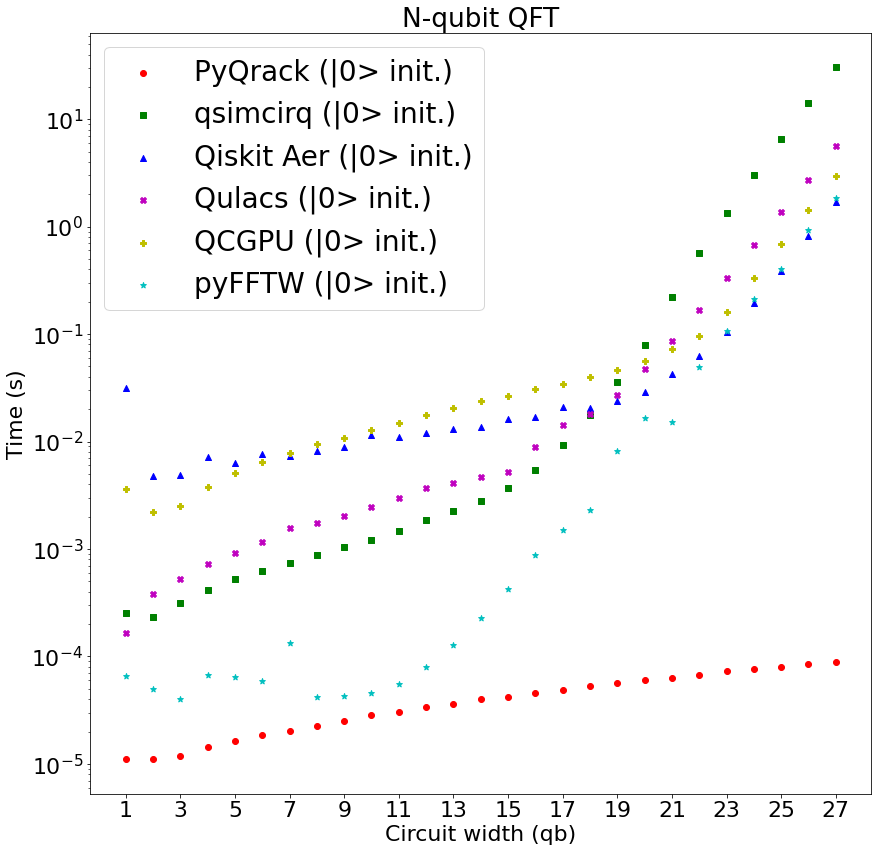

In [27]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=28)
plt.rcParams.update({'font.size': 22})

colors = list("kcymbgr")
markers = list("D*PX^so")

x = qrack_0_results.keys()
y = qrack_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = cuquantum_results.keys()
y = cuquantum_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = aer_results.keys()
y = aer_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qulacs_results.keys()
y = qulacs_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qcgpu_results.keys()
y = qcgpu_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_0_results.keys()
y = fftw_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

plt.title("N-qubit QFT")
plt.xlabel("Circuit width (qb)")
plt.ylabel("Time (s)")
plt.legend(["PyQrack (|0> init.)", "qsimcirq (|0> init.)", "Qiskit Aer (|0> init.)", "Qulacs (|0> init.)", "QCGPU (|0> init.)", "pyFFTW (|0> init.)"])
plt.yscale("log")
plt.xticks(np.arange(low, high + 1, step=2))

plt.show()

fig.savefig('qft_0_chart.png', dpi=100)

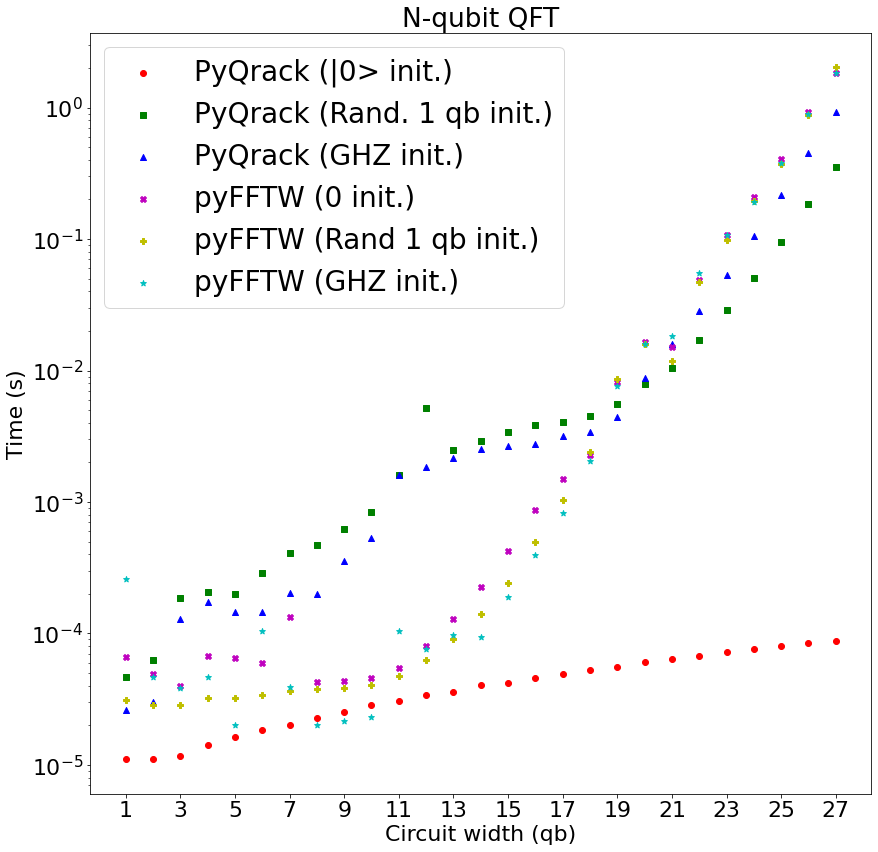

In [28]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=28)
plt.rcParams.update({'font.size': 22})

colors = list("cymbgr")
markers = list("*PX^so")

x = qrack_0_results.keys()
y = qrack_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qrack_results.keys()
y = qrack_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qrack_k_results.keys()
y = qrack_k_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_0_results.keys()
y = fftw_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_results.keys()
y = fftw_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_k_results.keys()
y = fftw_k_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

plt.title("N-qubit QFT")
plt.xlabel("Circuit width (qb)")
plt.ylabel("Time (s)")
plt.legend(["PyQrack (|0> init.)", "PyQrack (Rand. 1 qb init.)", "PyQrack (GHZ init.)", "pyFFTW (0 init.)", "pyFFTW (Rand 1 qb init.)", "pyFFTW (GHZ init.)"])
plt.yscale("log")
plt.xticks(np.arange(low, high + 1, step=2))

plt.show()

fig.savefig('qft_ghz_chart.png', dpi=100)

In [18]:
import platform

print(platform.machine())
print(platform.version())
print(platform.platform())
print(platform.uname())
print(platform.system())
print(platform.processor())

x86_64
#36~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Fri Feb 17 15:17:25 UTC 2
Linux-5.19.0-35-generic-x86_64-with-glibc2.35
uname_result(system='Linux', node='sekhmet', release='5.19.0-35-generic', version='#36~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Fri Feb 17 15:17:25 UTC 2', machine='x86_64')
Linux
x86_64


In [19]:
import subprocess

line_as_bytes = subprocess.check_output("nvidia-smi -L", shell=True)
line = line_as_bytes.decode("ascii")
_, line = line.split(":", 1)
line, _ = line.split("(")
print(line.strip())

NVIDIA GeForce RTX 3080 Laptop GPU


In [20]:
import cpuinfo
cpuinfo.get_cpu_info()['brand_raw']

'Intel(R) Core(TM) i9-10980HK CPU @ 2.40GHz'